# MSDS7333-4023 Unit 14 PROJECT : 
# Classification Model Development with Anonymized Data

## Mooyoung Lee 8/20/2018

# <span style="color:blue">Introduction: 

<span style="color:black; font-size: 1.3em;"> Data anonymization is common practice to protect private information or to prevent reverse engineering from competitors. The given data set for this classification task was also anonymized to some degree since there was no identifiable feature names.  **To solve this banary(0 or 1) classification task, stacking method was utilized to maximize the accuracy while minimizing the false-positive rate.** Multiple stacking architectures were tried with different classifiers.  Classifier optimization was performed.  Relation between the weight of sample and the false-positive rate is studied.  

# <span style="color:blue">Objective summary: 

- <span style="color:black; font-size: 1.3em;">Find the best classification model for this given data set.  
- <span style="color:black; font-size: 1.3em;">Provide logical decision on model selction and tuning
- <span style="color:black; font-size: 1.3em;">Specially pay attention to have low false-positive rate since that is what customer cares about. 

# <span style="color:blue">Data Exploration:

## <span style="color:red">Data Set <a name="data"></a>
<span style="color:black; font-size: 1.3em;">The length of recordings were **160,000**.  The dataset include **50 independent variables('x0-x49')** and **1 dependent variable('y')**. Dropping recordings with any **missing data** resulted to delete **1,608 recordings**.  Only **98.995%** of original data was used to develop classification models.  Later, data imputation techniques can be applied to replace those missing values if needed.  

[Code](#datac)

## <span style="color:red">5 object type features <a name="object"></a>

<span style="color:black; font-size: 1.3em;">Feture **'x24'** included 3 classes(**Asia, Europe, America**) so this feature also splitted into three **dummy variables**. 

<span style="color:black; font-size: 1.3em;">Feature **'x29'** indluced **12 classes describing month values**.  Feature **'x30'** showed day of a week value **from Monday to Friday**.  These values can be converted into ordinal numeric values but the difference between the ordinal numbers cannot be quantified.  Thus, those 'x29' and 'x30' were splitted into **dummy variables** using one-hot encoding method.   

<span style="color:black; font-size: 1.3em;">Feature x24, x29, and x30 included some **typos** and inconsistent capitalizations such as 'Dev' for December, 'euorpe' for Europe.  Aussume this data collection is done from a new project or the company that has lack or resources or system.  **This may indicate there are other human errors in this given data set.**  

<span style="color:black; font-size: 1.3em;">Feature **'x32'** showed descrete values and the values were distributed from **-0.05% to 0.05%**.  The distribution of values were normal.  The values of 'x32' feature seems like having some comparable meaning between them. So this feature is treated as  **interval scale value** and the % sign is removed.  For example, Fahrenheit is in interval scale.

<span style="color:black; font-size: 1.3em;">**'x37'** feature had $ sign so the sign is removed and converted into **numeric** type.  This value seemed to describe change in some dollar amount. 

<span style="color:black; font-size: 1.3em;">After above data transformations, **the final number of predictor features were 67**. These 67 features were **scaled to 0 to 1 range** to work with neural network model without issues.  

[Code](#objectc)

## <span style="color:red">Normal Distribution Test  <a name="normal"></a>

<span style="color:black; font-size: 1.3em;"> The distribution of all features were checked to see if there are any features requiring an advanced data transformation such as log-transformation.  The **k2 normal score** is used from 'scipy.stats.mstats.normaltest' library.  k2 score is a summation of square of each skew and kurtosis values.  Based on the chi-square p-value, all features that are classified as non-normal are visually inspected.  However, **there were no features showing strong skewness that require transformation.** 

[Code](#normalc)

# <span style="color:blue">Method & Result:

## <span style="color:red">Classifier Selection: <a name="class"></a>


<span style="color:black; font-size: 1.3em;"> **13 different classifiers** are tried with default classifier settings to see which classifier matches well with the data set for this project.  

<span style="color:black; font-size: 1.3em;"> The whole data set is used to check the accuracy of each classifier using a Python library, "sklearn.model_selection.cross_val_score(clf,X,y, cv =3)".  This cross-validation library automatically split data into stratified k-fold and output accuracy values.  **Stratified 3-fold** train and validation method is used **for this classifier selection process** to have confidence in the model accuracy values.  The average accuracy with test data set is shown on the below **Figure 1**.


<br />
<br />


<img src="data/plot_accuracies.png"/>

**<span style="color:black; font-size: 1.3em;">Figure 1. Classification Accuracy of Multiple Classifiers**

[Code](#classc)

## <span style="color:red">Stacking Architecture: <a name="stack"></a>

<span style="color:black; font-size: 1.3em;"> **[Stacking](https://en.wikipedia.org/wiki/Ensemble_learning#Stacking) is a method utilizing the predictions of other learning algorithms to train a final learning algorithm.**  Normally, the final combiner algorithm is a logistic regression in practice. Below is the stacking configurations that I tried.

**<span style="color:black; font-size: 1.3em;">Table 1. Stacking Configuration and Result**
<img src="data/stacking1.jpg"/><br />
Where, 
- LinearSVC is a Linear Support Vector Classifier with linear kernel.
- SVC_RBF is a Support Vector Classifier with Radial-basis function kernel (aka squared-exponential kernel).
- RandomForest is a random forest classifier.
- LDA is a Linear Discriminant Analysis classifier. 
- GaussianNB is a Gaussian Naive Bayes classifier.
- MLP is a Multi-layer Perceptron classifier.
- ' * ' after classifier name indicate the hyperparameters for the classifier is optimized. 
<br />

**<span style="color:black; font-size: 1.3em;">Table 2. Stacking Configuration and Result**
<img src="data/stacking2.jpg"/>



<span style="color:black; font-size: 1.3em;">The **configuration 1 to 4** were tried by adding an additional classifier from each configuration to feed stage 2 logistic regression algorithm.  Adding outputs from GaussianNB and MLP into stage2 Logistic Regression was not increasing any classification score(Accuracy, ROC_AUC, Precision).  For stage 1, LinearSVC and Random Forest configuration showed best performance with 0.923-accuracy and 0.920-precision.  

[Code](#stack1)

<span style="color:black; font-size: 1.3em;">Since the LinearSVC and the Random Forest classifiers are going to used for furthur analysis, those **classifiers are optimized using a random grid search tool**, "sklearn.model_selection.RandomizedSearchCV".  This random grid search tool saved time since it is not running with all hyperparameter combinations like the traditional grid search but it randomly select a subset of all hyperparameter combinations with a given iteration number ('n_iter'). Below hyperparameters were found from the random grid search to maximize precision score.  
- <span style="color:blue; font-size: 1.3em;">RandomForest: {'n_estimators': 400, 'min_samples_split': 2, 'max_depth': 20, 'criterion': 'entropy'}
- <span style="color:blue; font-size: 1.3em;">LinearSVC : {'penalty': 'l2', 'loss': 'hinge', 'C': 1.2}

[Code](#optic)

<span style="color:black; font-size: 1.3em;">The configurations 5 was a run with all optimized LinearSCV and RandomForest classifiers.  The stage2 classifier is changed from LogisticRegression to MLP(neural net) to see if it has more power to correct the predictions from stage1. There was no noticible difference with MLP classifier as stage2 wrapper.  

<span style="color:black; font-size: 1.3em;">The **focus of configurations from 6 to 10 was reducing False-Positive rate**, which can be measured by Precision or Type1 error.  The sample weights are all equal to 1 as a default for the LinearSVC and RandomForest classifiers.  Since the **ratio of 'y' class 0 vs 1 was about 6:4**, the weight of 0 and 1 are 1/6 and 1/4 accordingly.  The sample weights can be updated automatically by using **"class_weight = 'balanced'"** as an input to the stage1 classifiers.  (Since the "stratified" k-fold CV was used, the weights between folds will be consistent with 'balanced' option.)  From configuration 6 to 7, the precision score increased by 0.013 which was from 324 counts reduction in False-Positive prediction (out of 52,797 test samples for 3-fold ).   Another way to assign weight is entering a dictionary values for each class values. For configuration 8, **"class_weight = {0:1, 1:2}"** statement is used to give an weight 1 for class 0 and weight 2 for class 1.  This **change in weight resulted increase in precision** by 0.006.  From configuration 9, 1:3 weights are tried and the precision was also increased by 0.009 from balanced weight configuration.  This **weight manipulation caused decrease in accuracy** by 0.002 and 0.003 which seems like a small cost to gain the increase in precision.  Configuration 10 was tried since the more information for training should give more power to classify correctly.  So the cross validation fold is increased from 3 to 10.  This way the learning algorithm will see 90% of all data during the training process not 66%.  As predicted, the **accuracy and the precision both by 0.003 with increase in k-fold number**(configuration from 7 to 10).  Thus, there are ways to reduce False-Positive rates.  

[Code](#stack6)

<span style="color:black; font-size: 1.3em;">**Configuration 11** was the final attempt due to the **time limit** of this project.  In this configuration **PCA components** are added to stage1 outputs along with **LinearSVC and RandomForest** predictions.  PCA creates new features using all input features.  Included the top 5 PCA components and hoped to give more information that LinearSCV and RandomForest were missing.  Stage2 classifier is changed at the same time into a **custom 4-layer neeural network model**.  Since the sklearn MLPclassifier felt like a black box that gives no control, a custom neural network model is used.  Below is a diagram of how the configuration 11 works. 


<br />
<img src="data/stacking_11.png"/>

**<span style="color:black; font-size: 1.3em;">Figure 2. Stacking Configuration 11**

<span style="color:black; font-size: 1.3em;">Above architecutre showed more than **99.8% training accuracy but the test accuracy was around 92~93%**.  Thus, above model is showing a **slight overfitting**.  This model can be generalize by giving higher **dropout ratio** for the neurons, which is an easiest way with this model setup.  The overall classification performance(including accuracy and precision) were very sensitive to the dropout ratio, which was tried but not included here. Controlling [L2 regularization and input noise](https://cs231n.github.io/neural-networks-1/) are available methods to handle overfitting problem.  

[Code](#stack11)

# <span style="color:blue">Conclusion:
    
<span style="color:black; font-size: 1.3em;">The best model with highest accuracy and precision without manipulating sample weight was the **stacking method** shown on Figure 2.  The highest test **accuracy was 0.928 and the precision was 0.929** with stratified 10-fold average. The TypeI error rate with this model was 0.046.  If company wants to reduce this False-Positive rate more, there is a way.  The precision value will go up easily by 0.01 if the weight for the 'y' class value 1 is increased to twice, which is 3 from balanced weight of 1.5(from 6:4 sample ratio).  The training accurcy of this model was over 0.998 all the time. There is no need to add more complexity in this model but requires to generalize this model more so that the test accuracy match with training accuracy. 





# <span style="color:blue"> Reference Code:<a name="datac"></a>
    
[Back to top](#data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,3)

In [2]:
data=pd.read_csv('final_project.csv')

In [3]:
len(data)

160000

In [4]:
data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [5]:
data.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000,159970.000000,...,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000,159968.000000,159968.000000,160000.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,...,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224,0.401231
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185,6.355040,...,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157,1.935501,15.036738,0.490149
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251641,-4.260973,-10.166536,-5.454438,-4.313118,-5.148130,-14.780146,-27.324771,-6.031058,-4.260619,...,-5.804080,-5.162869,-1.039677,-2.812055,-0.266518,-36.428329,-3.216016,-1.320800,-10.931753,0.000000
50%,-0.002047,0.004813,-1.340932,-0.031408,0.000857,0.014118,-1.948594,-6.956789,-0.016840,0.006045,...,6.840110,-1.923754,-0.004385,-0.010484,0.001645,-12.982497,0.035865,-0.011993,-0.574410,0.000000
75%,0.248532,4.284220,7.871676,5.445179,4.306660,5.190749,11.446931,12.217071,5.972349,4.305734,...,19.266367,1.453507,1.033275,2.783274,0.269049,11.445443,3.268028,1.317703,9.651072,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


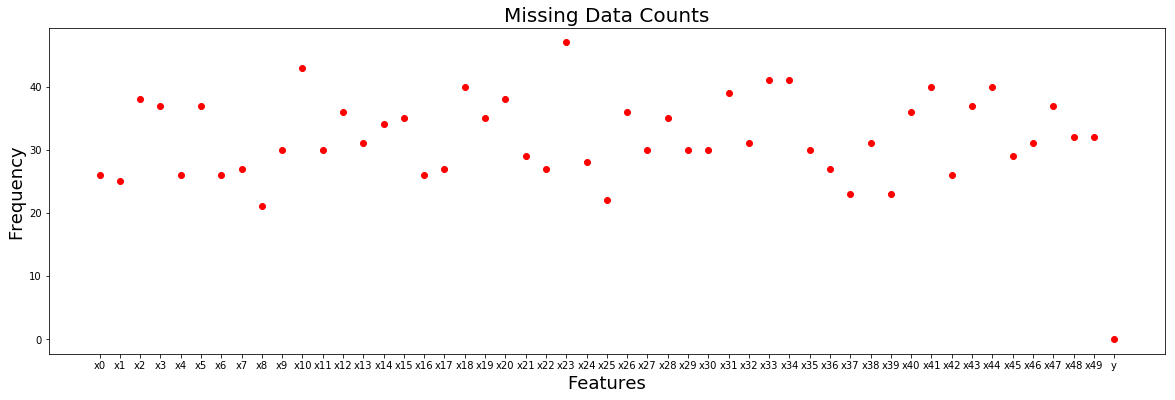

In [6]:
plt.rcParams["figure.figsize"] = (20,6)
plt.plot(data.isnull().sum(),'ro')
plt.xlabel('Features',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.title('Missing Data Counts',fontsize=20)
plt.show()

## dropped recordings with missing values were about 1 percent of data.  

Once a model is selcted and tuned, we can come back to this missing data to see the performance w/ the final model and to find ways to improve.

In [7]:
classRatio = pd.DataFrame(data['y'].value_counts())

In [8]:
data.dropna(inplace = True, axis = 0)

In [9]:
len(data)/160000

0.98995

# Classes of dependent variable, 'y', is showing about 6:4 ratio.

In [10]:
classRatio['y2'] = data['y'].value_counts()
classRatio['diff'] = classRatio.diff(axis=1).iloc[:,1]
classRatio

,y,y2,diff
0,95803,94846,-957.0
1,64197,63546,-651.0


# [Normal distribution test](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mstats.normaltest.html)<a name="normalc"></a>

It is based on D’Agostino and Pearson’s [R246], [R247] test that combines skew and kurtosis to produce an omnibus test of normality.

k2 : s^2 + k^2, where s is the z-score returned by skewtest and k is the z-score returned by kurtosistest.

p-value : A 2-sided chi squared probability for the hypothesis test.

[Back to top](#normal)

In [11]:
from scipy.stats.mstats import normaltest
k2, p = normaltest(data.loc[:, data.dtypes != object], axis=0)
result_normal = pd.DataFrame({'feature': data.loc[:, data.dtypes != object].columns,'k2':k2, 'p':p})
result_normal.sort_values(by = 'p', ascending = True)

,feature,k2,p
45,y,NaN,0.000000e+00
7,x7,825.637983,5.187882e-180
12,x12,593.740956,1.177036e-129
41,x46,503.994335,3.622603e-110
37,x42,476.165356,3.999509e-104
35,x40,474.376196,9.784031e-104
23,x23,328.553492,4.523928e-72
20,x20,214.809452,2.263186e-47
27,x28,174.932278,1.032615e-38
26,x27,62.709922,2.413867e-14


# Distribution of non-normal features (by a normal test)

Below plot shows there is no extream distribution that we have to worry about for transformation.

In [12]:
feature_nonNormal = result_normal.loc[result_normal['p']<0.05].sort_values(by = 'p', ascending = True).feature
feature_nonNormal = feature_nonNormal.drop([45], axis = 0)  # delete 'y'
feature_nonNormal.reset_index(drop = True, inplace = True)

C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


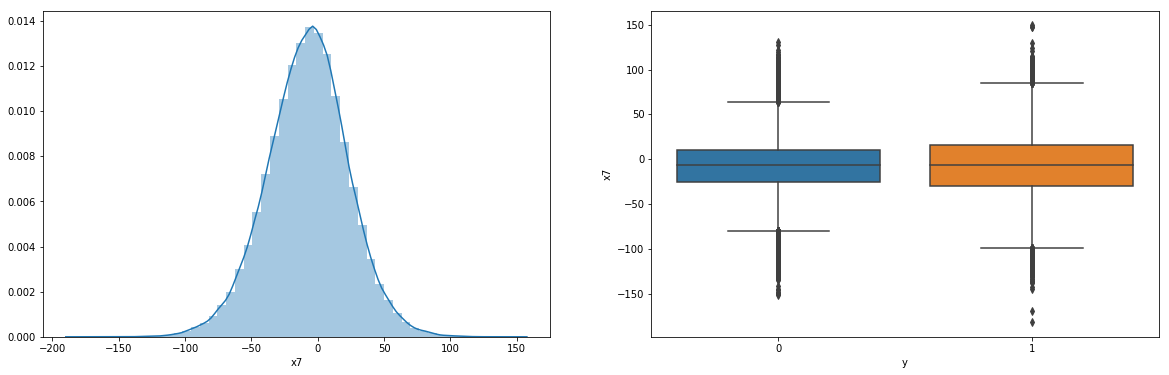

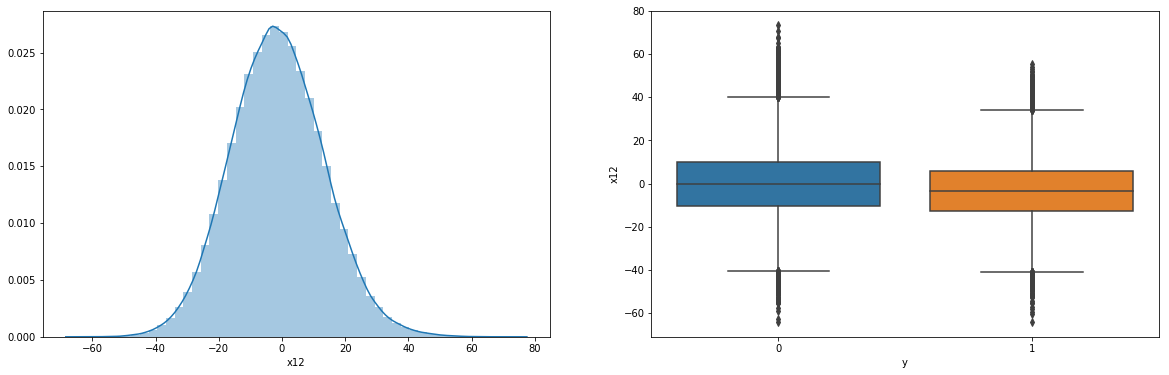

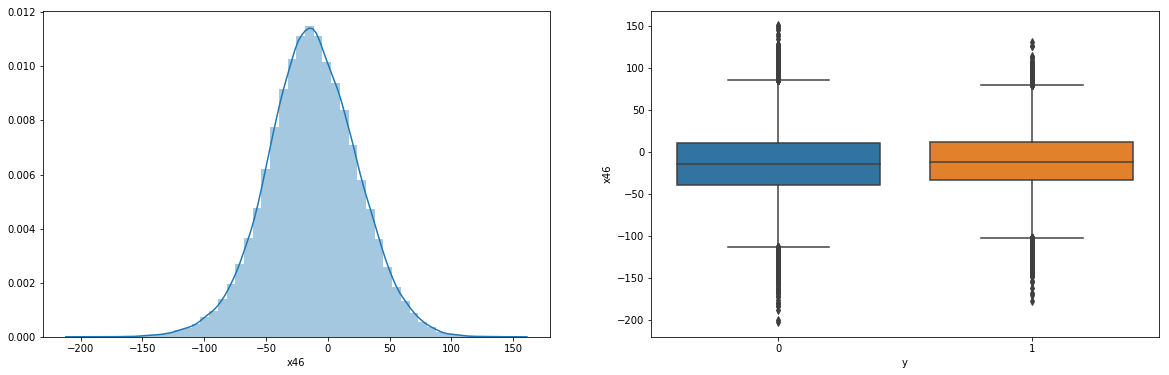

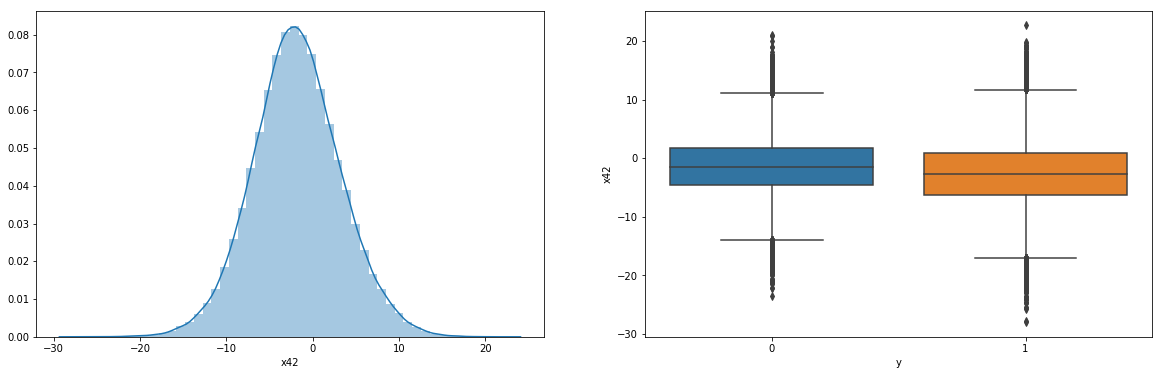

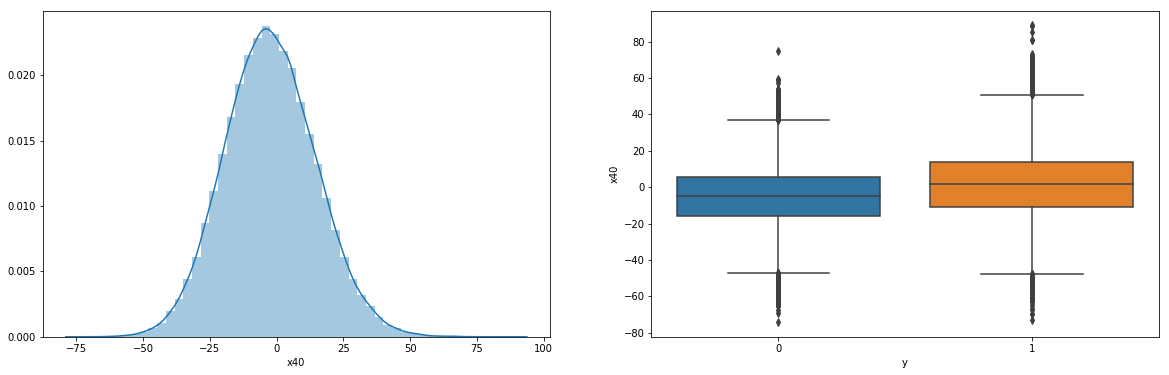

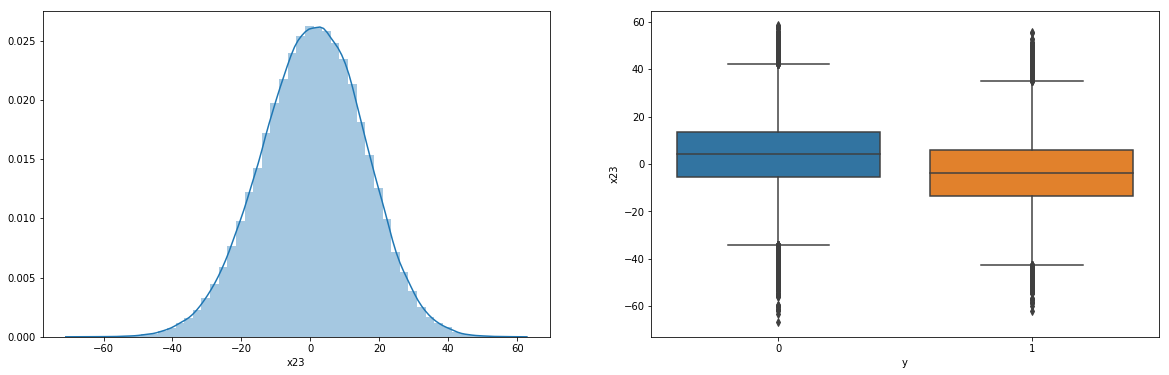

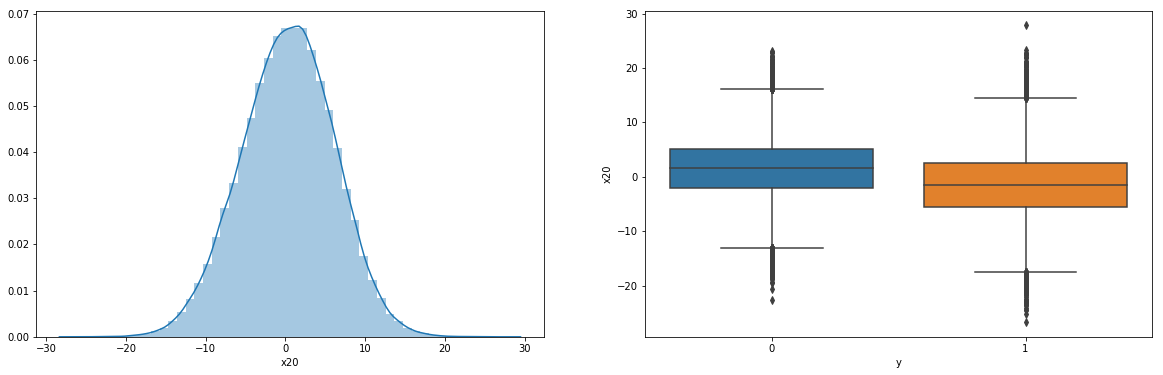

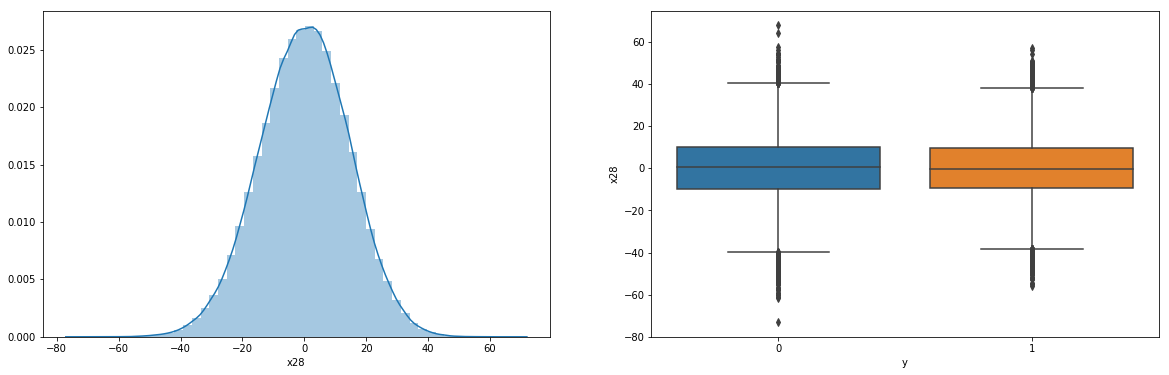

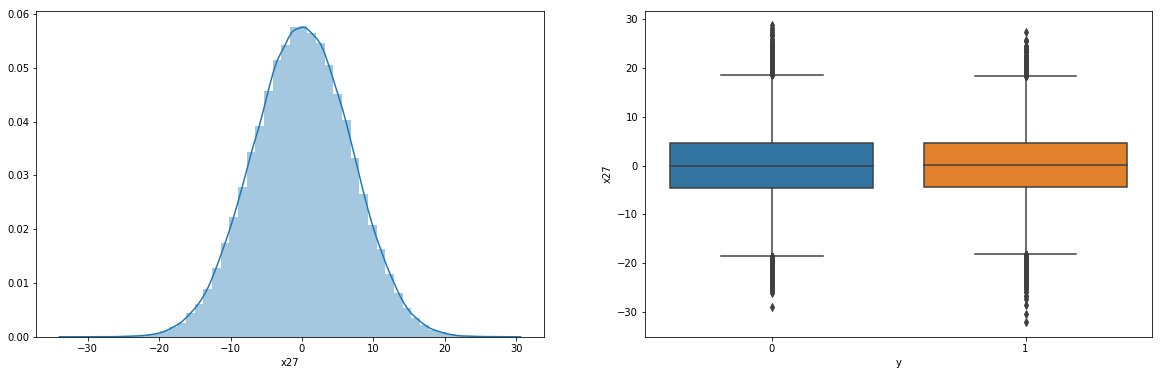

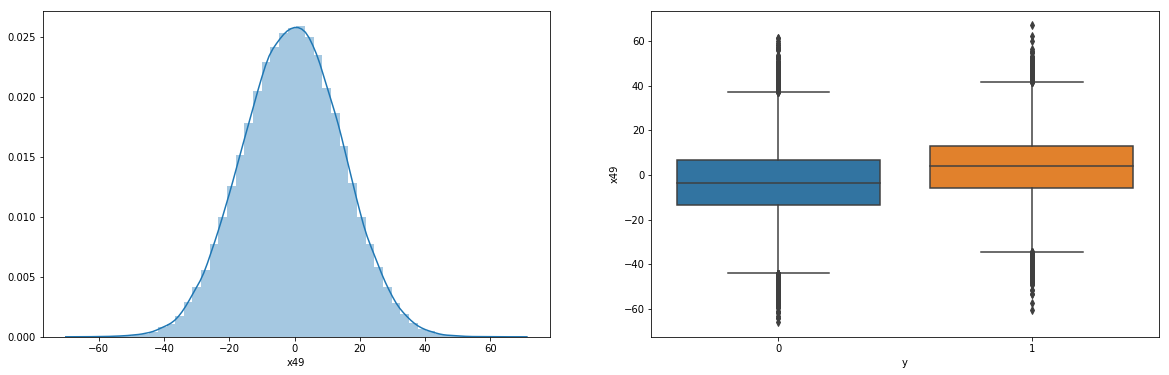

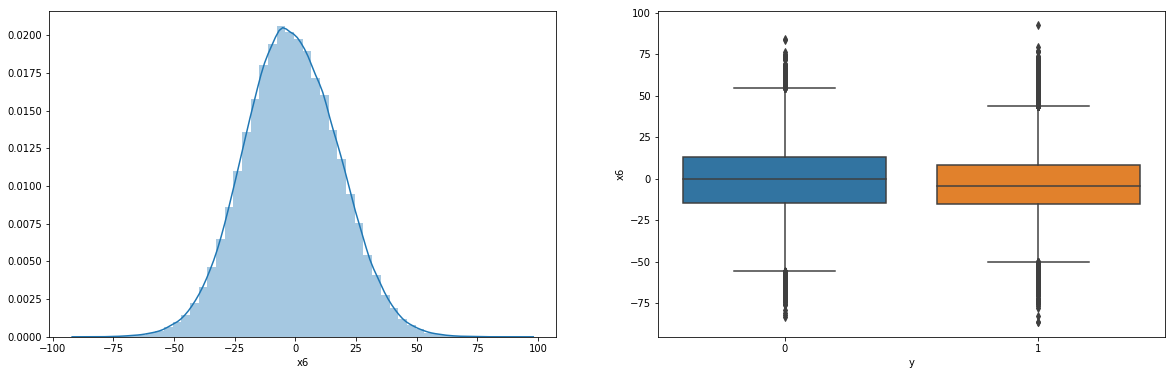

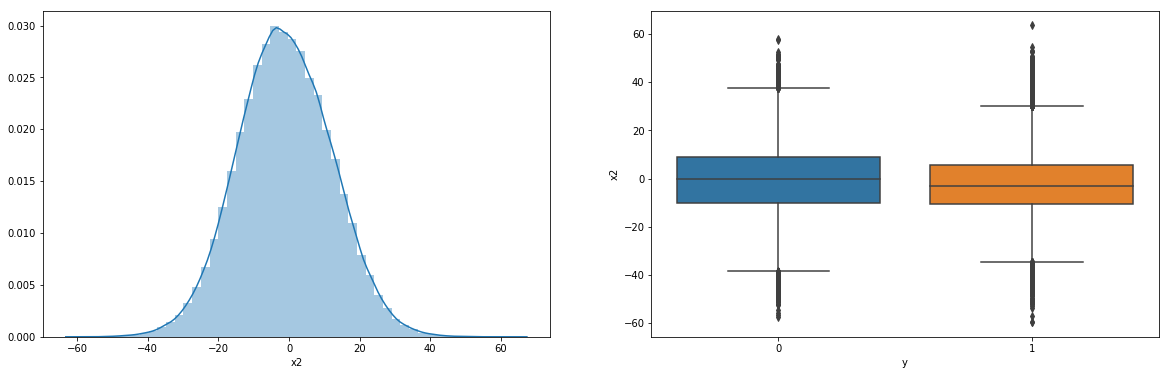

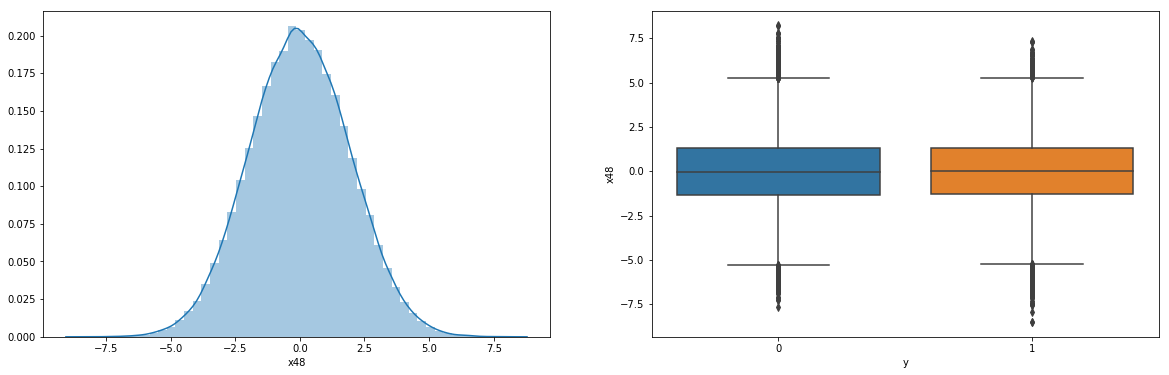

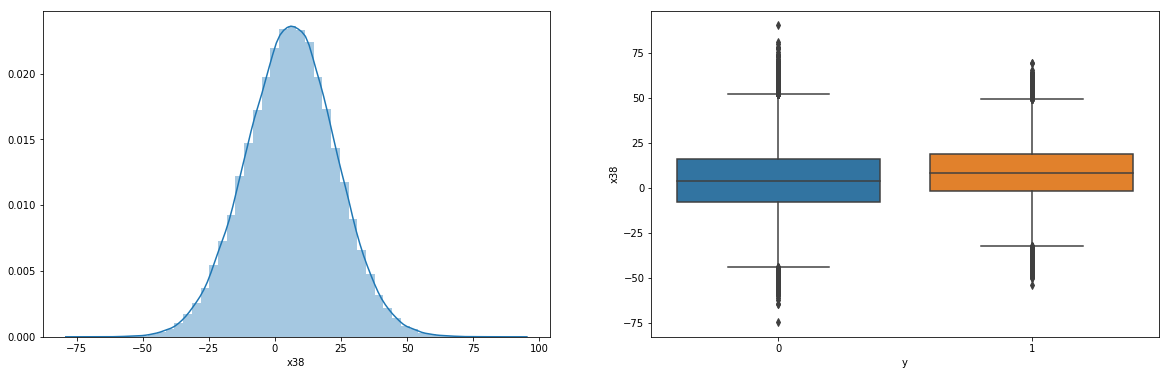

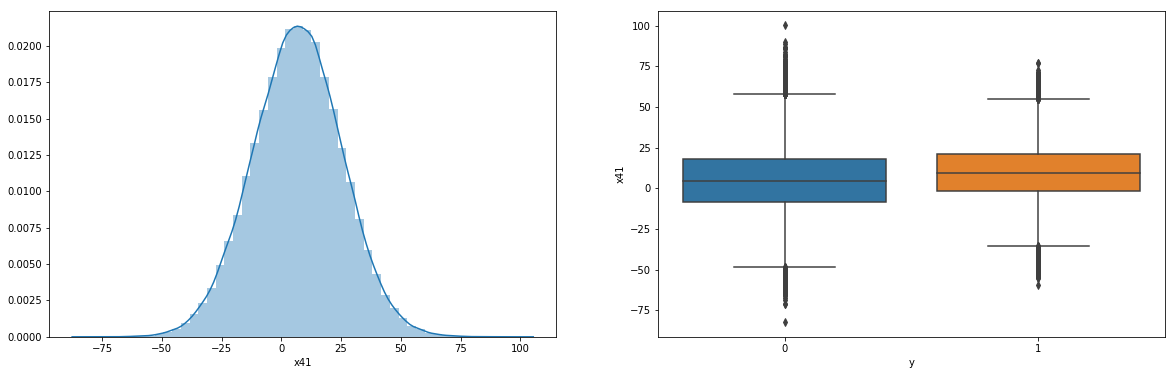

In [13]:
import seaborn as sns 
sample4plot = data.sample(n = 1000, random_state = 0, axis = 0)
for i, name in enumerate(feature_nonNormal):
   
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    sns.distplot(data[feature_nonNormal[i]])
    ax2 = fig.add_subplot(122)
    sns.boxplot(x="y", y= name, data=data)
    plt.show()

# Columns other than numeric type <a name="objectc"></a>

[Back to top](#object)

In [14]:
data.loc[0:5, data.dtypes == object]

,x24,x29,x30,x32,x37
0,euorpe,July,tuesday,0.0%,$1313.96
1,asia,Aug,wednesday,-0.02%,$1962.78
2,asia,July,wednesday,-0.01%,$430.47
3,asia,July,wednesday,0.01%,$-2366.29
4,asia,July,tuesday,0.01%,$-620.66
5,asia,Aug,wednesday,-0.01%,$-196.45


# Remove $ character from x37

In [15]:
data['x37'] = data['x37'].str.replace('$', '')
data['x37'] = data['x37'].astype(float)

In [16]:
data['x37'].head()

0    1313.96
1    1962.78
2     430.47
3   -2366.29
4    -620.66
Name: x37, dtype: float64

# Remove % character from x32

In [17]:
data['x32'] = data['x32'].str.replace('%', '')
data['x32'] = data['x32'].astype(float)

In [18]:
data['x32'].head()

0    0.00
1   -0.02
2   -0.01
3    0.01
4    0.01
Name: x32, dtype: float64

# Month and day of the week are in ordinal scale.  The ordinal values should be treated as classes since the difference between them do not have a quantifiable meaning.

In [19]:
data['x29'].value_counts()

July       45122
Jun        40900
Aug        29115
May        21708
sept.      10740
Apr         6699
Oct         2385
Mar         1221
Nov          331
Feb          139
Dev           23
January        9
Name: x29, dtype: int64

In [20]:
data['x30'].value_counts()

wednesday    100498
thurday       29164
tuesday       27690
friday          556
monday          484
Name: x30, dtype: int64

In [21]:
data['x24'].value_counts()

asia       137596
euorpe      16378
america      4418
Name: x24, dtype: int64

# Features with ordinal scale spreaded using dummy variables

In [22]:
#drops columns in place
data=pd.get_dummies(data, columns = ['x24','x29','x30'], dummy_na=False)

In [23]:
list(data.columns.values)[-21:]

['y',
 'x24_america',
 'x24_asia',
 'x24_euorpe',
 'x29_Apr',
 'x29_Aug',
 'x29_Dev',
 'x29_Feb',
 'x29_January',
 'x29_July',
 'x29_Jun',
 'x29_Mar',
 'x29_May',
 'x29_Nov',
 'x29_Oct',
 'x29_sept.',
 'x30_friday',
 'x30_monday',
 'x30_thurday',
 'x30_tuesday',
 'x30_wednesday']

# 'x32' feature showed only 11-different discrete values

Assume this is not in nominal or ordinal scale since the values are distributed from -0.05 to 0.05.  The frequency distribution shown normally distributed with a center value close to zero.  This feature even passed a normality test from above steps.  

The values of 'x32' feature seems like having some comparable meaning between them.  I will treat this feature as an interval scale at least.  For example, Fahrenheit is in interval scale.  Thus, 'x32' feature will not be transformed into dummy variable. 

In [24]:
# colnames=list(data.columns.values)
# for i in colnames[0:]:
#         if str(data[i].dtype)!='object':
#             facet = sns.FacetGrid(data, hue='y',aspect=2)
#             facet.map(sns.kdeplot,i)
#             facet.add_legend()
#             plt.show()

data['x32'].value_counts()

 0.00    63780
 0.01    40367
-0.01    33771
-0.02     9812
 0.02     7911
-0.03     1709
 0.03      845
-0.04      136
 0.04       54
-0.05        6
 0.05        1
Name: x32, dtype: int64

C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


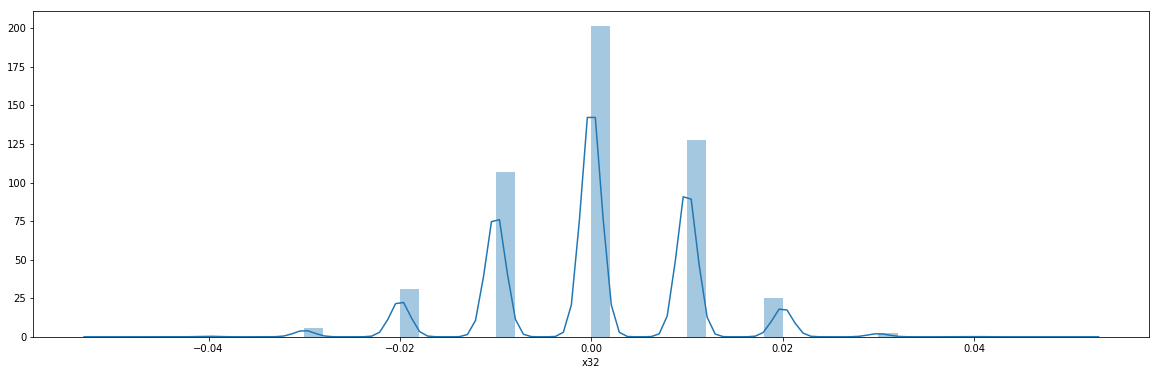

In [25]:
sns.distplot(data['x32'])

# Scale data into 0 to 1 range

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data.drop('y', 1))

In [27]:
X_scaled.shape

(158392, 67)

# Model selection using multiple models <a name="classc"></a>

<span style="color:black; font-size: 1.3em;">This model selection code was executed from multiple cells below.  Some classifier,GaussianProcessClassifier, caused a memory issue. Below accuracy values are summarized on the top nicely.  

[Back to top](#class)

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

names = ["Logistic Regression", "SGDClassifier", "Nearest Neighbors", 
         "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net",
         "Naive Bayes", "QDA", "Extra Random Trees", "Boosted Tree"]

# Default parameters are used for all algorithms.
classifiers = [
    LogisticRegression(),
    SGDClassifier(),
    KNeighborsClassifier(n_neighbors=5, leaf_size=30),
    LinearSVC(),
    SVC(kernel = 'rbf'),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(criterion = 'entropy'),
    RandomForestClassifier(n_estimators=100, criterion='entropy'),
    MLPClassifier(activation='relu', solver='adam', learning_rate='adaptive'),
#     AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state = 0),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    ExtraTreesClassifier(n_estimators=100, criterion='entropy'),
    GradientBoostingClassifier(n_estimators=100)]


# Input Values
X = X_scaled
y = data['y']

# # Sampling only 10,000 samples for this process
# np.random.seed(1)
# sampleRow = np.random.choice(len(y0),10000) # samples row numbers
# X = X[sampleRow,:] # samples for scatter plot 
# y = y[sampleRow]

# Prediction Accuracy
for name, clf in zip(names, classifiers):
    acc = cross_val_score(clf,X,y, cv =3)  # Stratified 3-fold
    print (name, acc.mean())

C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Logistic Regression 0.7025291721020311


C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\M

SGDClassifier 0.6895738732131034
Nearest Neighbors 0.7556884219357137
Linear SVM 0.702055661903986


In [28]:
# import numpy as np
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

names = ["RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net",
         "Naive Bayes", "QDA", "Extra Random Trees", "Boosted Tree"]

# Default parameters are used for all algorithms.
classifiers = [
    SVC(kernel = 'rbf'),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(criterion = 'entropy'),
    RandomForestClassifier(n_estimators=100, criterion='entropy'),
    MLPClassifier(activation='relu', solver='adam', learning_rate='adaptive'),
#     AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state = 0),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    ExtraTreesClassifier(n_estimators=100, criterion='entropy'),
    GradientBoostingClassifier(n_estimators=100)]


# Input Values
X = X_scaled
y = data['y']

# # Sampling only 10,000 samples for this process
# np.random.seed(1)
# sampleRow = np.random.choice(len(y0),10000) # samples row numbers
# X = X[sampleRow,:] # samples for scatter plot 
# y = y[sampleRow]

# Prediction Accuracy
for name, clf in zip(names, classifiers):
    acc = cross_val_score(clf,X,y, cv =3)  # Stratified 3-fold
    print (name, acc.mean())

C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RBF SVM 0.7120940497146752


MemoryError: 

In [29]:
# import numpy as np
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

names = ["Decision Tree", "Random Forest", "Neural Net",
         "Naive Bayes", "QDA", "Extra Random Trees", "Boosted Tree"]

# Default parameters are used for all algorithms.
classifiers = [
    DecisionTreeClassifier(criterion = 'entropy'),
    RandomForestClassifier(n_estimators=100, criterion='entropy'),
    MLPClassifier(activation='relu', solver='adam', learning_rate='adaptive'),
#     AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state = 0),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    ExtraTreesClassifier(n_estimators=100, criterion='entropy'),
    GradientBoostingClassifier(n_estimators=100)]


# Input Values
X = X_scaled
y = data['y']

# # Sampling only 10,000 samples for this process
# np.random.seed(1)
# sampleRow = np.random.choice(len(y0),10000) # samples row numbers
# X = X[sampleRow,:] # samples for scatter plot 
# y = y[sampleRow]

# Prediction Accuracy
for name, clf in zip(names, classifiers):
    acc = cross_val_score(clf,X,y, cv =3)  # Stratified 3-fold
    print (name, acc.mean())

Decision Tree 0.852543064135797
Random Forest 0.9200969729540712
Neural Net 0.9157533008985155
Naive Bayes 0.6838162438968848


C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.

QDA 0.5722512867451239
Extra Random Trees 0.9122177822332712
Boosted Tree 0.8376433185346243


In [82]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_scaled
y = data['y']
clf = LinearDiscriminantAnalysis()
acc = cross_val_score(clf,X,y, cv =3)  # Stratified 3-fold
print('LDA accuracy: \n', acc)

C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy: 
 [0.70140914 0.70119514 0.70312707]


C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


# Feature Importance by Random Forest Classifier

In [30]:
clf = RandomForestClassifier(n_estimators=100, criterion='entropy')

X = X_scaled
y = data['y']


clf.fit(X, y)
clf.feature_importances_

array([8.35752443e-03, 8.26019603e-03, 2.86072206e-02, 8.37997000e-03,
       8.31794763e-03, 8.28740519e-03, 2.76075684e-02, 3.92446663e-02,
       8.29396897e-03, 8.34875680e-03, 8.34758326e-03, 8.32779068e-03,
       4.71318324e-02, 8.25419349e-03, 8.32936221e-03, 8.40952407e-03,
       8.28721969e-03, 8.02428143e-03, 8.31838052e-03, 8.44221526e-03,
       5.41405966e-02, 8.28286629e-03, 8.23001929e-03, 6.54497624e-02,
       8.22777387e-03, 8.42598918e-03, 4.58768863e-02, 4.75444999e-02,
       8.30286353e-03, 2.65859497e-02, 8.45217385e-03, 8.22741952e-03,
       8.29866962e-03, 8.23392442e-03, 4.33747498e-02, 3.28132717e-02,
       8.09910167e-03, 4.40971643e-02, 3.36108508e-02, 4.87628105e-02,
       8.31420367e-03, 8.33421552e-03, 8.39325983e-03, 3.54292932e-02,
       8.24414241e-03, 6.01545403e-02, 5.46688360e-02, 1.23211644e-03,
       3.51440880e-03, 3.20698358e-03, 3.92925268e-04, 8.55782567e-04,
       2.72290616e-06, 2.12229294e-05, 1.01170183e-05, 1.02846975e-03,
      

In [ ]:
Result_RF_Importance = pd.DataFrame({'Feature':})

In [31]:
clf.decision_path

<bound method BaseForest.decision_path of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)>

# Feature Importance by RandomForest algorithm

In [38]:
col_names = list(data.columns.values)[0:]
# col_names = col_names[col_names != 'y']
del col_names[col_names.index('y')]

Importance_RF = pd.DataFrame({'Feature':col_names, 'Importance':clf.feature_importances_})
Importance_RF.sort_values(by = 'Importance', ascending = False)

,Feature,Importance
23,x23,0.065450
45,x48,0.060155
46,x49,0.054669
20,x20,0.054141
39,x42,0.048763
27,x28,0.047544
12,x12,0.047132
26,x27,0.045877
37,x40,0.044097
34,x37,0.043375


# Top two important features ('x23','x48') and the Least important features

C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


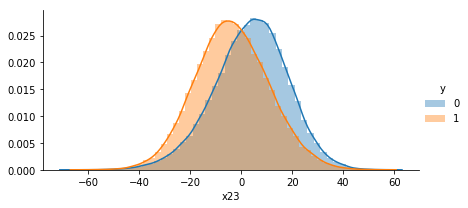

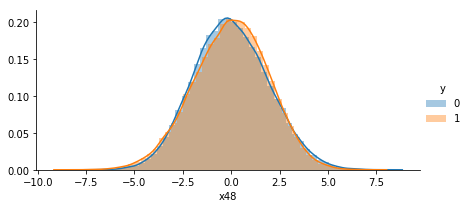

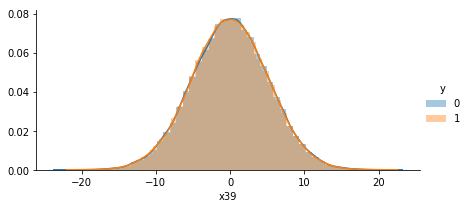

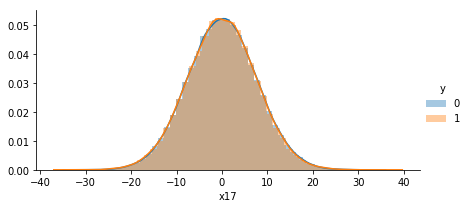

In [39]:
colnames= ['x23','x48','x39','x17']
for i in colnames[0:]:
        if str(data[i].dtype)!='object':
            facet = sns.FacetGrid(data, hue='y',aspect=2)
            facet.map(sns.distplot,i)
            facet.add_legend()
            plt.show()

In [35]:
col_names != 'y'

True

# Stacking #1: RandomForest + SVM <a name="stack1"></a>

[Back to top](#stack)


In [46]:
from sklearn.model_selection import StratifiedKFold
X = data.drop('y', 1).reset_index(drop=True).values
y = data['y'].reset_index(drop=True).values

cv = StratifiedKFold(n_splits=3, shuffle= True, random_state= 1)
cv.get_n_splits(X, y)

3

In [47]:
%%time
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

svm = LinearSVC()
clf1 = CalibratedClassifierCV(svm, cv=2, method = 'isotonic')  # calibrated probability; enable 'predict_proba' method
clf2 = RandomForestClassifier(n_estimators=100, criterion='entropy')
stage2 = LogisticRegression()

result =[]
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf1.fit(X_train,y_train)
    clf2.fit(X_train,y_train)
    
    pred1 = clf1.predict_proba(X_train)[:,1]
    pred2 = clf2.predict_proba(X_train)[:,1]
    stage2_train = pd.DataFrame({'pred1':pred1,'pred2':pred2})
    stage2.fit(stage2_train, y_train)
        
    pred1 = clf1.predict_proba(X_test)[:,1]
    pred2 = clf2.predict_proba(X_test)[:,1]
    stage2_test = pd.DataFrame({'pred1':pred1,'pred2':pred2})
    final = stage2.predict(stage2_test)
    
    conf = confusion_matrix(y_true = y_test, y_pred = final)
#     print('Confusion Matrix :\n', conf)
    acc = accuracy_score(y_true = y_test, y_pred = final)
#     print('Accuracy score :', acc)
    roc = roc_auc_score(y_true = y_test, y_score = final)
#     print('ROC AUC score :', roc)
    
    result.append([roc, acc]+ conf.ravel().tolist())   # save result scores

result_fold = pd.DataFrame(result, columns = ['ROC_AUC','Accuracy','TN','FP','FN','TP'])
print('CV result :\n', result_fold)
print('CV average :\n', result_fold.mean())

CV result :
     ROC_AUC  Accuracy     TN    FP    FN     TP
0  0.916461  0.922838  29995  1621  2453  18729
1  0.916998  0.922837  29925  1690  2384  18798
2  0.915817  0.922477  30019  1596  2497  18685
CV average :
 ROC_AUC         0.916426
Accuracy        0.922717
TN          29979.666667
FP           1635.666667
FN           2444.666667
TP          18737.333333
dtype: float64
Wall time: 8min 45s


# Stacking #2: RandomForest + SVM(RBF kernel) + LDA

In [85]:
%%time
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.calibration import CalibratedClassifierCV

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression


svm = SVC(kernel = 'rbf')
clf1 = CalibratedClassifierCV(svm, cv=2, method = 'isotonic')  # calibrated probability; enable 'predict_proba' method
clf2 = RandomForestClassifier(n_estimators=100, criterion='entropy')
clf3 = LinearDiscriminantAnalysis()
stage2 = LogisticRegression()

result =[]
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf1.fit(X_train,y_train)
    clf2.fit(X_train,y_train)
    clf3.fit(X_train,y_train)
    
    pred1 = clf1.predict_proba(X_train)[:,1]
    pred2 = clf2.predict_proba(X_train)[:,1]
    pred3 = clf3.predict_proba(X_train)[:,1]
    stage2_train = pd.DataFrame({'pred1':pred1,'pred2':pred2,'pred3':pred3})
    stage2.fit(stage2_train, y_train)
        
    pred1 = clf1.predict_proba(X_test)[:,1]
    pred2 = clf2.predict_proba(X_test)[:,1]
    pred3 = clf3.predict_proba(X_test)[:,1]
    stage2_test = pd.DataFrame({'pred1':pred1,'pred2':pred2,'pred3':pred3})
    final = stage2.predict(stage2_test)
    
    conf = confusion_matrix(y_true = y_test, y_pred = final)
    acc = accuracy_score(y_true = y_test, y_pred = final)
    roc = roc_auc_score(y_true = y_test, y_score = final)
    result.append([roc, acc]+ conf.ravel().tolist())   # save result scores

result_fold = pd.DataFrame(result, columns = ['ROC_AUC','Accuracy','TN','FP','FN','TP'])
print('CV result :\n', result_fold)
print('CV average :\n', result_fold.mean())

C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


CV result :
     ROC_AUC  Accuracy     TN    FP    FN     TP
0  0.908808  0.916304  29932  1684  2735  18447
1  0.916062  0.920886  29733  1882  2295  18887
2  0.908246  0.916245  29994  1621  2801  18381
CV average :
 ROC_AUC         0.911039
Accuracy        0.917812
TN          29886.333333
FP           1729.000000
FN           2610.333333
TP          18571.666667
dtype: float64
Wall time: 5h 36min 15s


# Stacking #3

In [86]:
%%time
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.calibration import CalibratedClassifierCV

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

svm = SVC(kernel = 'rbf')
clf1 = CalibratedClassifierCV(svm, cv=2, method = 'isotonic')  # calibrated probability; enable 'predict_proba' method
clf2 = RandomForestClassifier(n_estimators=100, criterion='entropy')
clf3 = LinearDiscriminantAnalysis()
clf4 = GaussianNB()
stage2 = LogisticRegression()

result =[]
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf1.fit(X_train,y_train)
    clf2.fit(X_train,y_train)
    clf3.fit(X_train,y_train)
    clf4.fit(X_train,y_train)
    
    pred1 = clf1.predict_proba(X_train)[:,1]
    pred2 = clf2.predict_proba(X_train)[:,1]
    pred3 = clf3.predict_proba(X_train)[:,1]
    pred4 = clf4.predict_proba(X_train)[:,1]
    stage2_train = pd.DataFrame({'pred1':pred1,'pred2':pred2,'pred3':pred3,'pred4':pred4})
    stage2.fit(stage2_train, y_train)
        
    pred1 = clf1.predict_proba(X_test)[:,1]
    pred2 = clf2.predict_proba(X_test)[:,1]
    pred3 = clf3.predict_proba(X_test)[:,1]
    pred4 = clf4.predict_proba(X_test)[:,1]
    stage2_test = pd.DataFrame({'pred1':pred1,'pred2':pred2,'pred3':pred3,'pred4':pred4})
    final = stage2.predict(stage2_test)
    
    conf = confusion_matrix(y_true = y_test, y_pred = final)
    acc = accuracy_score(y_true = y_test, y_pred = final)
    roc = roc_auc_score(y_true = y_test, y_score = final)
    result.append([roc, acc]+ conf.ravel().tolist())   # save result scores

result_fold = pd.DataFrame(result, columns = ['ROC_AUC','Accuracy','TN','FP','FN','TP'])
print('CV result :\n', result_fold)
print('CV average :\n', result_fold.mean())

C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


CV result :
     ROC_AUC  Accuracy     TN    FP    FN     TP
0  0.908717  0.916474  29971  1645  2765  18417
1  0.916144  0.921189  29771  1844  2317  18865
2  0.909588  0.917647  30046  1569  2779  18403
CV average :
 ROC_AUC         0.911483
Accuracy        0.918437
TN          29929.333333
FP           1686.000000
FN           2620.333333
TP          18561.666667
dtype: float64
Wall time: 5h 36min 1s


# Classifier Optimization - RandomForest <a name="optic"></a>

<span style="color:blue; font-size: 1.3em;">Outputs are saved as an image since this code was ran from a duplicated notebook.

[Back to top](#opti)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
X = X_scaled
y = data['y']

tuned_parameters={'n_estimators':[100,200,300,400,500], 
                  'criterion':['gini','entropy'], 'max_depth':[5,10,20],
                 'min_samples_split':[2,4,8]}
scores = ['precision']

# Random Grid Search for target evalulation score
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = RandomizedSearchCV(RandomForestClassifier(), tuned_parameters, cv=3,
                       scoring='%s_macro' % score,n_iter = 20)
    clf.fit(X, y)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
#     print()
#     y_true, y_pred = y_test, clf.predict(X_test)
#     print(classification_report(y_true, y_pred))
#     print()

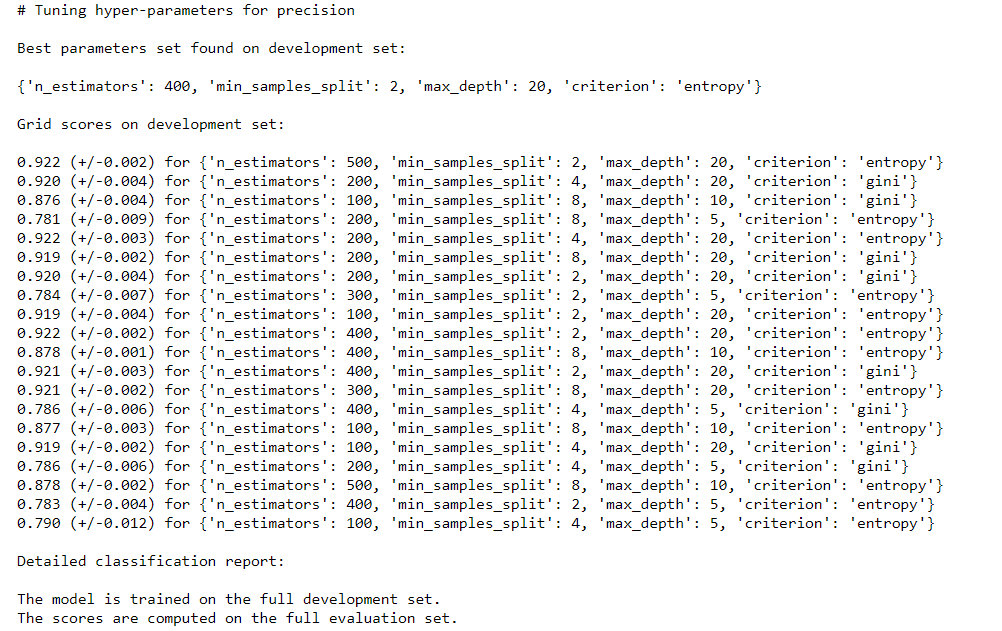

In [48]:
from IPython.display import Image
Image(filename='data/RandGrid_RF.PNG') 

# Classifier Optimization - SVM

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC
X = X_scaled
y = data['y']

tuned_parameters={'penalty':['l2'], 
                  'loss':['hinge','squared_hinge'], 
                  'C':[.8, 1, 1.2]}
scores = ['precision']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = RandomizedSearchCV(LinearSVC(), tuned_parameters, cv=3,
                       scoring='%s_macro' % score,n_iter = 6)
    clf.fit(X, y)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")

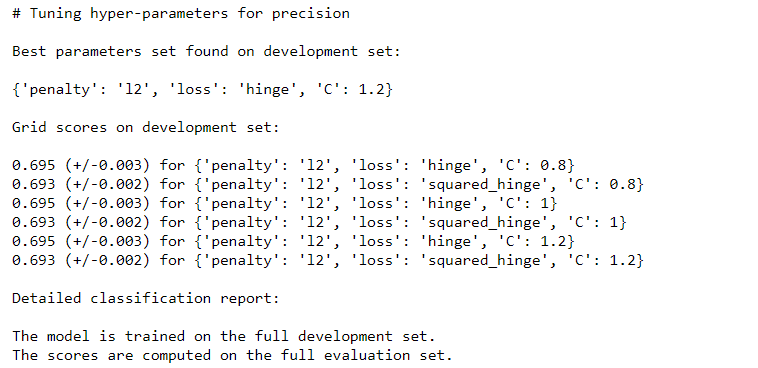

In [49]:
from IPython.display import Image
Image(filename='data/RandGrid_SVM.PNG') 

# Stacking #4

In [87]:
%%time
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.calibration import CalibratedClassifierCV

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


svm = SVC(kernel = 'rbf')
clf1 = CalibratedClassifierCV(svm, cv=2, method = 'isotonic')  # calibrated probability; enable 'predict_proba' method
clf2 = RandomForestClassifier(n_estimators=100, criterion='entropy')
clf3 = LinearDiscriminantAnalysis()
clf4 = GaussianNB()
clf5 = MLPClassifier(activation='relu', solver='adam', learning_rate='adaptive')
stage2 = LogisticRegression()

result =[]
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf1.fit(X_train,y_train)
    clf2.fit(X_train,y_train)
    clf3.fit(X_train,y_train)
    clf4.fit(X_train,y_train)
    clf5.fit(X_train,y_train)
    
    pred1 = clf1.predict_proba(X_train)[:,1]
    pred2 = clf2.predict_proba(X_train)[:,1]
    pred3 = clf3.predict_proba(X_train)[:,1]
    pred4 = clf4.predict_proba(X_train)[:,1]
    pred5 = clf5.predict_proba(X_train)[:,1]
    stage2_train = pd.DataFrame({'pred1':pred1,'pred2':pred2,'pred3':pred3,'pred4':pred4,'pred5':pred5})
    stage2.fit(stage2_train, y_train)
        
    pred1 = clf1.predict_proba(X_test)[:,1]
    pred2 = clf2.predict_proba(X_test)[:,1]
    pred3 = clf3.predict_proba(X_test)[:,1]
    pred4 = clf4.predict_proba(X_test)[:,1]
    pred5 = clf5.predict_proba(X_test)[:,1]
    stage2_test = pd.DataFrame({'pred1':pred1,'pred2':pred2,'pred3':pred3,'pred4':pred4,'pred5':pred5})
    final = stage2.predict(stage2_test)
    
    conf = confusion_matrix(y_true = y_test, y_pred = final)
    acc = accuracy_score(y_true = y_test, y_pred = final)
    roc = roc_auc_score(y_true = y_test, y_score = final)
    result.append([roc, acc]+ conf.ravel().tolist())   # save result scores

result_fold = pd.DataFrame(result, columns = ['ROC_AUC','Accuracy','TN','FP','FN','TP'])
print('CV result :\n', result_fold)
print('CV average :\n', result_fold.mean())

C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


CV result :
     ROC_AUC  Accuracy     TN    FP    FN     TP
0  0.908031  0.915830  29956  1660  2784  18398
1  0.915173  0.920147  29729  1886  2330  18852
2  0.906689  0.915033  30000  1615  2871  18311
CV average :
 ROC_AUC         0.909964
Accuracy        0.917003
TN          29895.000000
FP           1720.333333
FN           2661.666667
TP          18520.333333
dtype: float64
Wall time: 6h 14min 50s


# Stacking #5: RandomForest + SVM + Neural Net
    

In [88]:
%%time
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier

svm = LinearSVC(penalty='l2', loss= 'hinge', C= 1.2)
clf1 = CalibratedClassifierCV(svm, cv=2, method = 'isotonic')  # calibrated probability; enable 'predict_proba' method
clf2 = RandomForestClassifier(n_estimators=400, criterion='entropy', min_samples_split= 2, max_depth= 20)
stage2 = MLPClassifier(activation='relu', solver='adam', learning_rate='adaptive')

result =[]
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf1.fit(X_train,y_train)
    clf2.fit(X_train,y_train)
    
    pred1 = clf1.predict_proba(X_train)[:,1]
    pred2 = clf2.predict_proba(X_train)[:,1]
    stage2_train = pd.DataFrame({'pred1':pred1,'pred2':pred2})
    stage2.fit(stage2_train, y_train)
        
    pred1 = clf1.predict_proba(X_test)[:,1]
    pred2 = clf2.predict_proba(X_test)[:,1]
    stage2_test = pd.DataFrame({'pred1':pred1,'pred2':pred2})
    final = stage2.predict(stage2_test)
    
    conf = confusion_matrix(y_true = y_test, y_pred = final)
    acc = accuracy_score(y_true = y_test, y_pred = final)
    roc = roc_auc_score(y_true = y_test, y_score = final)
    
    result.append([roc, acc]+ conf.ravel().tolist())   # save result scores

result_fold = pd.DataFrame(result, columns = ['ROC_AUC','Accuracy','TN','FP','FN','TP'])
print('CV result :\n', result_fold)
print('CV average :\n', result_fold.mean())

CV result :
     ROC_AUC  Accuracy     TN    FP    FN     TP
0  0.919905  0.924770  29862  1754  2218  18964
1  0.919444  0.924068  29808  1807  2202  18980
2  0.916709  0.920905  29653  1962  2214  18968
CV average :
 ROC_AUC         0.918686
Accuracy        0.923247
TN          29774.333333
FP           1841.000000
FN           2211.333333
TP          18970.666667
dtype: float64
Wall time: 25min 54s


# Stacking #6 <a name="stack6"></a>

[Back to top](#stack)

In [89]:
%%time
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier

svm = LinearSVC(penalty='l2', loss= 'hinge', C= 1.2)
clf1 = CalibratedClassifierCV(svm, cv=2, method = 'isotonic')  # calibrated probability; enable 'predict_proba' method
clf2 = RandomForestClassifier(n_estimators=400, criterion='entropy', min_samples_split= 2, max_depth= 20)
stage2 = MLPClassifier(activation='logistic', solver='adam', learning_rate='adaptive')

result =[]
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf1.fit(X_train,y_train)
    clf2.fit(X_train,y_train)
    
    pred1 = clf1.predict_proba(X_train)[:,1]
    pred2 = clf2.predict_proba(X_train)[:,1]
    stage2_train = pd.DataFrame({'pred1':pred1,'pred2':pred2})
    stage2.fit(stage2_train, y_train)
        
    pred1 = clf1.predict_proba(X_test)[:,1]
    pred2 = clf2.predict_proba(X_test)[:,1]
    stage2_test = pd.DataFrame({'pred1':pred1,'pred2':pred2})
    final = stage2.predict(stage2_test)
    
    conf = confusion_matrix(y_true = y_test, y_pred = final)
    acc = accuracy_score(y_true = y_test, y_pred = final)
    roc = roc_auc_score(y_true = y_test, y_score = final)
    
    result.append([roc, acc]+ conf.ravel().tolist())   # save result scores

result_fold = pd.DataFrame(result, columns = ['ROC_AUC','Accuracy','TN','FP','FN','TP'])
print('CV result :\n', result_fold)
print('CV average :\n', result_fold.mean())

CV result :
     ROC_AUC  Accuracy     TN    FP    FN     TP
0  0.919945  0.924183  29763  1853  2150  19032
1  0.921083  0.924352  29643  1972  2022  19160
2  0.916875  0.921681  29756  1859  2276  18906
CV average :
 ROC_AUC         0.919301
Accuracy        0.923405
TN          29720.666667
FP           1894.666667
FN           2149.333333
TP          19032.666667
dtype: float64
Wall time: 27min 23s


# Stacking #7: Class weight adjusted w/ 'balanced' option

In [90]:
%%time
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier

svm = LinearSVC(penalty='l2', loss= 'hinge', C= 1.2, class_weight = 'balanced')
clf1 = CalibratedClassifierCV(svm, cv=2, method = 'isotonic')  # calibrated probability; enable 'predict_proba' method
clf2 = RandomForestClassifier(n_estimators=400, criterion='entropy', min_samples_split= 2, max_depth= 20,
                              class_weight = 'balanced')
stage2 = MLPClassifier(activation='logistic', solver='adam', learning_rate='adaptive')

result =[]
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf1.fit(X_train,y_train)
    clf2.fit(X_train,y_train)
    
    pred1 = clf1.predict_proba(X_train)[:,1]
    pred2 = clf2.predict_proba(X_train)[:,1]
    stage2_train = pd.DataFrame({'pred1':pred1,'pred2':pred2})
    stage2.fit(stage2_train, y_train)
        
    pred1 = clf1.predict_proba(X_test)[:,1]
    pred2 = clf2.predict_proba(X_test)[:,1]
    stage2_test = pd.DataFrame({'pred1':pred1,'pred2':pred2})
    final = stage2.predict(stage2_test)
    
    conf = confusion_matrix(y_true = y_test, y_pred = final)
    acc = accuracy_score(y_true = y_test, y_pred = final)
    roc = roc_auc_score(y_true = y_test, y_score = final)
    
    result.append([roc, acc]+ conf.ravel().tolist())   # save result scores

result_fold = pd.DataFrame(result, columns = ['ROC_AUC','Accuracy','TN','FP','FN','TP'])
print('CV result :\n', result_fold)
print('\nCV average :\n', result_fold.mean())

CV result :
     ROC_AUC  Accuracy     TN    FP    FN     TP
0  0.915651  0.923425  30193  1423  2620  18562
1  0.915525  0.922174  30008  1607  2502  18680
2  0.914819  0.921132  29932  1683  2481  18701
CV average :
 ROC_AUC         0.915332
Accuracy        0.922244
TN          30044.333333
FP           1571.000000
FN           2534.333333
TP          18647.666667
dtype: float64
Wall time: 27min 35s


# Stacking #8: Give more weight to the class '1' to reduce the FP rate

In [91]:
%%time
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier

svm = LinearSVC(penalty='l2', loss= 'hinge', C= 1.2, class_weight = {0:1, 1:2})
clf1 = CalibratedClassifierCV(svm, cv=2, method = 'isotonic')  # calibrated probability; enable 'predict_proba' method
clf2 = RandomForestClassifier(n_estimators=400, criterion='entropy', min_samples_split= 2, max_depth= 20,
                              class_weight =  {0:1, 1:2})
stage2 = MLPClassifier(activation='logistic', solver='adam', learning_rate='adaptive')

result =[]
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf1.fit(X_train,y_train)
    clf2.fit(X_train,y_train)
    
    pred1 = clf1.predict_proba(X_train)[:,1]
    pred2 = clf2.predict_proba(X_train)[:,1]
    stage2_train = pd.DataFrame({'pred1':pred1,'pred2':pred2})
    stage2.fit(stage2_train, y_train)
        
    pred1 = clf1.predict_proba(X_test)[:,1]
    pred2 = clf2.predict_proba(X_test)[:,1]
    stage2_test = pd.DataFrame({'pred1':pred1,'pred2':pred2})
    final = stage2.predict(stage2_test)
    
    conf = confusion_matrix(y_true = y_test, y_pred = final)
    acc = accuracy_score(y_true = y_test, y_pred = final)
    roc = roc_auc_score(y_true = y_test, y_score = final)
    
    result.append([roc, acc]+ conf.ravel().tolist())   # save result scores

result_fold = pd.DataFrame(result, columns = ['ROC_AUC','Accuracy','TN','FP','FN','TP'])
print('CV result :\n', result_fold)
print('\nCV average :\n', result_fold.mean())

CV result :
     ROC_AUC  Accuracy     TN    FP    FN     TP
0  0.910687  0.918880  30103  1513  2770  18412
1  0.914031  0.922249  30212  1403  2702  18480
2  0.910383  0.919579  30253  1362  2884  18298
CV average :
 ROC_AUC         0.911700
Accuracy        0.920236
TN          30189.333333
FP           1426.000000
FN           2785.333333
TP          18396.666667
dtype: float64
Wall time: 25min 47s


# Stacking #9

In [92]:
%%time
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier

svm = LinearSVC(penalty='l2', loss= 'hinge', C= 1.2, class_weight = {0:1, 1:3})
clf1 = CalibratedClassifierCV(svm, cv=2, method = 'isotonic')  # calibrated probability; enable 'predict_proba' method
clf2 = RandomForestClassifier(n_estimators=400, criterion='entropy', min_samples_split= 2, max_depth= 20,
                              class_weight =  {0:1, 1:3})
stage2 = MLPClassifier(activation='logistic', solver='adam', learning_rate='adaptive')

result =[]
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf1.fit(X_train,y_train)
    clf2.fit(X_train,y_train)
    
    pred1 = clf1.predict_proba(X_train)[:,1]
    pred2 = clf2.predict_proba(X_train)[:,1]
    stage2_train = pd.DataFrame({'pred1':pred1,'pred2':pred2})
    stage2.fit(stage2_train, y_train)
        
    pred1 = clf1.predict_proba(X_test)[:,1]
    pred2 = clf2.predict_proba(X_test)[:,1]
    stage2_test = pd.DataFrame({'pred1':pred1,'pred2':pred2})
    final = stage2.predict(stage2_test)
    
    conf = confusion_matrix(y_true = y_test, y_pred = final)
    acc = accuracy_score(y_true = y_test, y_pred = final)
    roc = roc_auc_score(y_true = y_test, y_score = final)
    
    result.append([roc, acc]+ conf.ravel().tolist())   # save result scores

result_fold = pd.DataFrame(result, columns = ['ROC_AUC','Accuracy','TN','FP','FN','TP'])
print('CV result :\n', result_fold)
print('\nCV average :\n', result_fold.mean())

CV result :
     ROC_AUC  Accuracy     TN    FP    FN     TP
0  0.909699  0.918993  30248  1368  2909  18273
1  0.912470  0.920753  30173  1442  2742  18440
2  0.908634  0.918632  30326  1289  3007  18175

CV average :
 ROC_AUC         0.910267
Accuracy        0.919459
TN          30249.000000
FP           1366.333333
FN           2886.000000
TP          18296.000000
dtype: float64
Wall time: 25min 54s


# Stacking #10

In [93]:
from sklearn.model_selection import StratifiedKFold
X = data.drop('y', 1).reset_index(drop=True).values
y = data['y'].reset_index(drop=True).values

cv10 = StratifiedKFold(n_splits=10, shuffle= True, random_state= 1)
cv10.get_n_splits(X, y)

10

In [94]:
%%time
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier

svm = LinearSVC(penalty='l2', loss= 'hinge', C= 1.2, class_weight = 'balanced')
clf1 = CalibratedClassifierCV(svm, cv=2, method = 'isotonic')  # calibrated probability; enable 'predict_proba' method
clf2 = RandomForestClassifier(n_estimators=400, criterion='entropy', min_samples_split= 2, max_depth= 20,
                              class_weight = 'balanced')
stage2 = MLPClassifier(activation='logistic', solver='adam', learning_rate='adaptive')

result =[]
for train_index, test_index in cv10.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf1.fit(X_train,y_train)
    clf2.fit(X_train,y_train)
    
    pred1 = clf1.predict_proba(X_train)[:,1]
    pred2 = clf2.predict_proba(X_train)[:,1]
    stage2_train = pd.DataFrame({'pred1':pred1,'pred2':pred2})
    stage2.fit(stage2_train, y_train)
        
    pred1 = clf1.predict_proba(X_test)[:,1]
    pred2 = clf2.predict_proba(X_test)[:,1]
    stage2_test = pd.DataFrame({'pred1':pred1,'pred2':pred2})
    final = stage2.predict(stage2_test)
    
    conf = confusion_matrix(y_true = y_test, y_pred = final)
    acc = accuracy_score(y_true = y_test, y_pred = final)
    roc = roc_auc_score(y_true = y_test, y_score = final)
    
    result.append([roc, acc]+ conf.ravel().tolist())   # save result scores

result_fold = pd.DataFrame(result, columns = ['ROC_AUC','Accuracy','TN','FP','FN','TP'])
print('CV result :\n', result_fold)
print('\nCV average :\n', result_fold.mean())

CV result :
     ROC_AUC  Accuracy    TN   FP   FN    TP
0  0.917816  0.924369  9020  465  733  5622
1  0.919492  0.925442  9007  478  703  5652
2  0.920606  0.927336  9055  430  721  5634
3  0.920208  0.926641  9037  448  714  5641
4  0.920344  0.925063  8956  529  658  5697
5  0.916876  0.923864  9032  453  753  5602
6  0.920690  0.926695  9020  464  697  5657
7  0.918175  0.924864  9029  455  735  5619
8  0.918629  0.925938  9063  421  752  5602
9  0.917651  0.924485  9031  453  743  5611

CV average :
 ROC_AUC        0.919049
Accuracy       0.925470
TN          9025.000000
FP           459.600000
FN           720.900000
TP          5633.700000
dtype: float64
Wall time: 2h 23s



# Stacking #11: Stage1(PCA+SVM+RF)+Stage2(NeuralNet) <a name="stack11"></a>


"The takeaway is that you should not be using smaller networks because you are afraid of overfitting. Instead, you should use as big of a neural network as your computational budget allows, and use other regularization techniques to control overfitting." (https://cs231n.github.io/neural-networks-1/)

[Back to top](#stack)

In [44]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
# from sklearn.metrics import roc_auc_score
# from sklearn import preprocessing

from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from matplotlib import interactive
interactive(True)
import matplotlib.pyplot as plt

from keras.callbacks import EarlyStopping, ModelCheckpoint, LambdaCallback
import numpy as np
import matplotlib.pyplot as plt
# plot_loss_callback = LambdaCallback(
#                     on_epoch_end=lambda epoch, logs: plt.plot(np.arange(epoch),
#                     logs['loss']))
# callbacks = [EarlyStopping(monitor='loss', patience= 2),
#              ModelCheckpoint(filepath='best_model.h5', monitor='loss', save_best_only=True),
#             plot_loss_callback]
callbacks = [EarlyStopping(monitor='loss', patience= 2),
             ModelCheckpoint(filepath='best_model.h5', monitor='loss', save_best_only=True)]

In [45]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# # Sample 10% data
# data_sample = data.sample(frac = 0.1, random_state=1)
# # data_sample['y'].value_counts()
# X = data_sample.drop('y', 1).reset_index(drop=True).values
# y = data_sample['y'].reset_index(drop=True).values

X = X_scaled
y = data['y'].values

# Train/Test Split
cv_obj = StratifiedKFold(n_splits=10, shuffle= True, random_state= 1)

from sklearn.decomposition import PCA
pca = PCA(n_components = 5)

svm = LinearSVC(penalty='l2', loss= 'hinge', C= 1.2, class_weight = 'balanced')
clf1 = CalibratedClassifierCV(svm, cv=2, method = 'isotonic')  # calibrated probability; enable 'predict_proba' method
clf2 = RandomForestClassifier(n_estimators=400, criterion='entropy', min_samples_split= 2, max_depth= 20,
                              class_weight = 'balanced')

result =[]
for train_index, test_index in cv_obj.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(len(y_train), len(y_test))
    
    clf1.fit(X_train,y_train)
    clf2.fit(X_train,y_train)
    
    # train data
    PCA_train = pca.fit_transform(X_train)
    pred1 = clf1.predict_proba(X_train)[:,1]
    pred2 = clf2.predict_proba(X_train)[:,1]
    
    stage2_train = pd.DataFrame(PCA_train)
    stage2_train['pred1'] = pred1
    stage2_train['pred2'] = pred2
    
    # test data
    pred1 = clf1.predict_proba(X_test)[:,1]
    pred2 = clf2.predict_proba(X_test)[:,1]
    
    PCA_test = pca.transform(X_test)
    stage2_test = pd.DataFrame(PCA_test)
    stage2_test['pred1'] = pred1
    stage2_test['pred2'] = pred2
    
    # stage2 w/ neural nets
    X2 = np.array(stage2_train)
    y2 = np.array(y_train)

    model = Sequential()
    model.add(Dense(128, input_dim= x.shape[1]))        # X_train.shape[1] == 28 here
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(128, kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(128, kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1, kernel_initializer='he_normal')) 
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')  # Configures the model for training

    model.fit(X2, y2, epochs=100, batch_size = 100, callbacks=callbacks)  # Train model

    final = model.predict_classes(stage2_test)
    conf = confusion_matrix(y_true = y_test, y_pred = final)
    acc = accuracy_score(y_true = y_test, y_pred = final)
    roc = roc_auc_score(y_true = y_test, y_score = final)

    result.append([roc, acc]+ conf.ravel().tolist())   # save result scores
    
#     # Accuracy Plot (Training olny)
#     plt.plot(history.history['acc'])
#     plt.title('Model Accuracy')
#     plt.ylabel('Accuracy')
#     plt.xlabel('Epoch')
#     plt.show()
    
#     # Loss Plot (Training olny)
#     plt.plot(history.history['loss'])
#     plt.title('Model Loss')
#     plt.ylabel('Loss')
#     plt.xlabel('Epoch')
#     plt.show()
    
result_fold = pd.DataFrame(result, columns = ['ROC_AUC','Accuracy','TN','FP','FN','TP'])
print('CV result :\n', result_fold)
print('\nCV average :\n', result_fold.mean())

142552 15840
Epoch 1/100
142552/142552 [==============================] - 11s 75us/step - loss: 0.0179 - acc: 0.9950
Epoch 2/100
142552/142552 [==============================] - 10s 73us/step - loss: 0.0057 - acc: 0.9980
Epoch 3/100
142552/142552 [==============================] - 10s 72us/step - loss: 0.0050 - acc: 0.9982
Epoch 4/100
142552/142552 [==============================] - 10s 70us/step - loss: 0.0048 - acc: 0.9982
Epoch 5/100
142552/142552 [==============================] - 10s 70us/step - loss: 0.0046 - acc: 0.9983
Epoch 6/100
142552/142552 [==============================] - 10s 72us/step - loss: 0.0044 - acc: 0.9984
Epoch 7/100
142552/142552 [==============================] - 10s 69us/step - loss: 0.0044 - acc: 0.9984
Epoch 8/100
142552/142552 [==============================] - 10s 73us/step - loss: 0.0046 - acc: 0.9983
142552 15840
Epoch 1/100
142552/142552 [==============================] - 11s 74us/step - loss: 0.0186 - acc: 0.9941
Epoch 2/100
142552/142552 [===========

142554/142554 [==============================] - 11s 76us/step - loss: 0.0044 - acc: 0.9983
Epoch 7/100
142554/142554 [==============================] - 11s 78us/step - loss: 0.0044 - acc: 0.9983
Epoch 8/100
142554/142554 [==============================] - 11s 77us/step - loss: 0.0044 - acc: 0.9984
Epoch 9/100
142554/142554 [==============================] - 11s 78us/step - loss: 0.0043 - acc: 0.9984
Epoch 10/100
142554/142554 [==============================] - 11s 78us/step - loss: 0.0043 - acc: 0.9984
Epoch 11/100
142554/142554 [==============================] - 11s 79us/step - loss: 0.0042 - acc: 0.9985
Epoch 12/100
142554/142554 [==============================] - 11s 80us/step - loss: 0.0043 - acc: 0.9984
Epoch 13/100
142554/142554 [==============================] - 12s 81us/step - loss: 0.0043 - acc: 0.9984
142554 15838
Epoch 1/100
142554/142554 [==============================] - 12s 87us/step - loss: 0.0192 - acc: 0.9945
Epoch 2/100
142554/142554 [==============================] 